# Chapter 13: Basis Encoding of Binary Vectors

 A set of binary vectors  is represent  by the  basis encoding. 

## Superpositions of Binary Patterns

Mmethod that was developed  by Ventura and Martinez.

In this example we store three binary patterns,
$ |01 \rangle_3,~~  |10 \rangle_2,~~ |11 \rangle_1 $

$Qiskit$ uses little endian notation 

\begin{equation}
| memory; c_2, c_1; register   \rangle = |q_5, q_4, q_3, q_2;  q_1, q_0  \rangle, 
\end{equation}

Qubts $0$ and $1$ represent the  load register, qubits $2$ and $3$ are the control qubits  and the qubits $4$ and $5$ represent  the memory register.
We use the \textit{statevector simulator} to check the value of all $6$ qubits.
The initial state is represented by the processing branch
\begin{equation}
| \psi   \rangle_0 =  | 0, 0; 1, 0; 0, 0  \rangle.
\end{equation}

In [1]:
import numpy as np
from qiskit import QuantumCircuit, Aer, execute
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import MCXGate
from math import pi

The qubit $3$ is set to one indicating (by $c_2=1$), that the basis state represents a processing branch. The pattern   $|10 \rangle$ is generated in the load register
and the memory register is set to $|11\rangle$.

In [2]:
qc = QuantumCircuit(6)

#0-1 loading register
#2-3 control register
#4-5 storage, memory 

qc.x(3)
qc.x(0)

qc.barrier()

qc.x(4)
qc.x(5)
qc.barrier()

qc.draw(fold=250)

┌───┐ ░       ░ 
q_0: ┤ X ├─░───────░─
     └───┘ ░       ░ 
q_1: ──────░───────░─
           ░       ░ 
q_2: ──────░───────░─
     ┌───┐ ░       ░ 
q_3: ┤ X ├─░───────░─
     └───┘ ░ ┌───┐ ░ 
q_4: ──────░─┤ X ├─░─
           ░ ├───┤ ░ 
q_5: ──────░─┤ X ├─░─
           ░ └───┘ ░


Total count are: {'111001': 1.0}


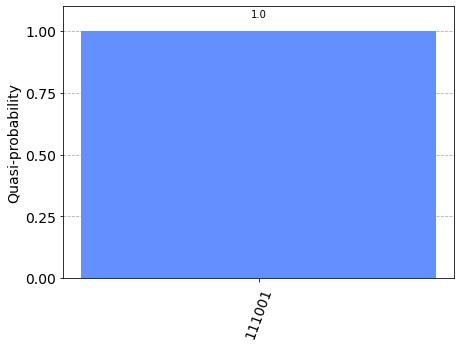

In [3]:
simulator = Aer.get_backend('statevector_simulator')

# Run and get counts
result=execute(qc,simulator).result()

counts = result.get_counts()

print("\nTotal count are:",counts)
plot_histogram(counts)

The resulting state is  $| \psi   \rangle_1 =   | 1, 1; 0, 1; 0, 1  \rangle$

The control qubit $2$ ($c_1=1$ ) is entangled with the memory register $|11\rangle$ by  the multi-controlled X (Toffoli) gate.  
The processing branch is split  by the operator $CS_3$ ($p=3$), creating a  new memory and  processing  branch. 


In [4]:
qc = QuantumCircuit(6)

#0-1 loading register
#2-3 control register
#4-5 storage, memory 

qc.x(3)
qc.x(0)

qc.barrier()

qc.x(4)
qc.x(5)
qc.barrier()
qc.ccx(4,5,2)

qc.cu(1.230959417340775,pi,pi,0,2,3)

qc.draw(fold=250)

┌───┐ ░       ░                        
q_0: ┤ X ├─░───────░────────────────────────
     └───┘ ░       ░                        
q_1: ──────░───────░────────────────────────
           ░       ░ ┌───┐                  
q_2: ──────░───────░─┤ X ├────────■─────────
     ┌───┐ ░       ░ └─┬─┘┌───────┴────────┐
q_3: ┤ X ├─░───────░───┼──┤ U(1.231,π,π,0) ├
     └───┘ ░ ┌───┐ ░   │  └────────────────┘
q_4: ──────░─┤ X ├─░───■────────────────────
           ░ ├───┤ ░   │                    
q_5: ──────░─┤ X ├─░───■────────────────────
           ░ └───┘ ░


Total count are: {'110101': 0.333333333333333, '111101': 0.666666666666666}


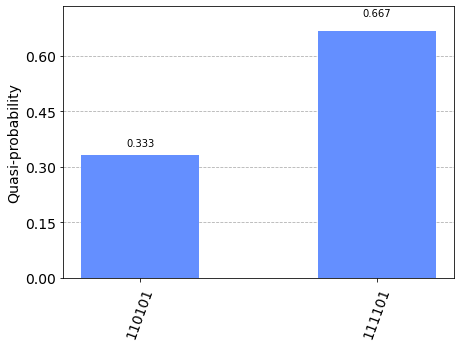

In [5]:
simulator = Aer.get_backend('statevector_simulator')

# Run and get counts
result=execute(qc,simulator).result()

counts = result.get_counts()

print("\nTotal count are:",counts)
plot_histogram(counts)

The resulting state is
 $| \psi   \rangle_2 =  \frac{1}{\sqrt{3}} | 1, 1; 0, 1; 0, 1  \rangle +\sqrt{\frac{2}{3}} | 1, 1; 1, 1; 0, 1  \rangle$.

We un-compute the entanglement of control qubit  $2$ ($c_1=1$) with the memory register $|11 \rangle$ (using  the multi-controlled X (Toffoli) gate). We apply the NOT gates operation and the controlled NOT operation  (CNOT gate) to  the memory register of both branches. As result we write $10$ into the  memory registers.

In [6]:
qc = QuantumCircuit(6)

#0-1 loading register
#2-3 control register
#4-5 storage, memory 

qc.x(3)
qc.x(0)

qc.barrier()

qc.x(4)
qc.x(5)
qc.barrier()

qc.ccx(4,5,2)
qc.cu(1.230959417340775,pi,pi,0,2,3)
qc.ccx(4,5,2)
qc.barrier()
qc.x(4)
qc.x(5)
qc.cx(1,5)
qc.cx(0,4)

qc.draw(fold=250)

┌───┐ ░       ░                              ░                
q_0: ┤ X ├─░───────░──────────────────────────────░─────────────■──
     └───┘ ░       ░                              ░             │  
q_1: ──────░───────░──────────────────────────────░────────■────┼──
           ░       ░ ┌───┐                  ┌───┐ ░        │    │  
q_2: ──────░───────░─┤ X ├────────■─────────┤ X ├─░────────┼────┼──
     ┌───┐ ░       ░ └─┬─┘┌───────┴────────┐└─┬─┘ ░        │    │  
q_3: ┤ X ├─░───────░───┼──┤ U(1.231,π,π,0) ├──┼───░────────┼────┼──
     └───┘ ░ ┌───┐ ░   │  └────────────────┘  │   ░ ┌───┐  │  ┌─┴─┐
q_4: ──────░─┤ X ├─░───■──────────────────────■───░─┤ X ├──┼──┤ X ├
           ░ ├───┤ ░   │                      │   ░ ├───┤┌─┴─┐└───┘
q_5: ──────░─┤ X ├─░───■──────────────────────■───░─┤ X ├┤ X ├─────
           ░ └───┘ ░                              ░ └───┘└───┘


Total count are: {'010001': 0.333333333333333, '011001': 0.666666666666666}


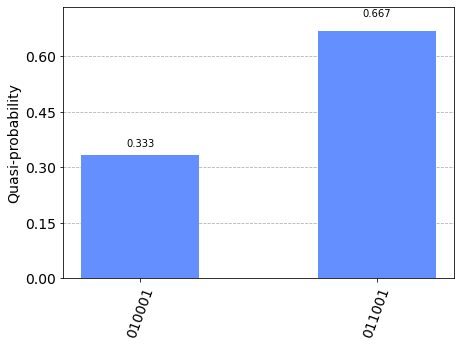

In [7]:
simulator = Aer.get_backend('statevector_simulator')

# Run and get counts
result=execute(qc,simulator).result()

counts = result.get_counts()

print("\nTotal count are:",counts)
plot_histogram(counts)

The resulting state is
 $| \psi   \rangle_3 =  \frac{1}{\sqrt{3}} | 0, 1; 0, 0; 0, 1  \rangle +\sqrt{\frac{2}{3}} | 0, 1; 1, 0; 0, 1  \rangle$.

We un-compute the memory register of the processing branch, setting it to the the ground state $|00\rangle$. We use the  ccX gate (CCNOT gate)  controlled by the load register and the control qubit $3$ ($c_2=1$ indicates the processing branch). We reset the load register to the ground state  $|00\rangle$.

In [8]:
qc = QuantumCircuit(6)

#0-1 loading register
#2-3 control register
#4-5 storage, memory 

qc.x(3)
qc.x(0)

qc.barrier()

qc.x(4)
qc.x(5)
qc.barrier()

qc.ccx(4,5,2)
qc.cu(1.230959417340775,pi,pi,0,2,3)
qc.ccx(4,5,2)
qc.barrier()
qc.x(4)
qc.x(5)
#Save
qc.cx(1,5)
qc.cx(0,4)

#Reset
qc.barrier()
qc.ccx(0,3,4)
qc.ccx(1,3,5)

qc.barrier()
qc.x(0)


qc.draw(fold=250)

┌───┐ ░       ░                              ░                 ░            ░ ┌───┐
q_0: ┤ X ├─░───────░──────────────────────────────░─────────────■───░───■────────░─┤ X ├
     └───┘ ░       ░                              ░             │   ░   │        ░ └───┘
q_1: ──────░───────░──────────────────────────────░────────■────┼───░───┼────■───░──────
           ░       ░ ┌───┐                  ┌───┐ ░        │    │   ░   │    │   ░      
q_2: ──────░───────░─┤ X ├────────■─────────┤ X ├─░────────┼────┼───░───┼────┼───░──────
     ┌───┐ ░       ░ └─┬─┘┌───────┴────────┐└─┬─┘ ░        │    │   ░   │    │   ░      
q_3: ┤ X ├─░───────░───┼──┤ U(1.231,π,π,0) ├──┼───░────────┼────┼───░───■────■───░──────
     └───┘ ░ ┌───┐ ░   │  └────────────────┘  │   ░ ┌───┐  │  ┌─┴─┐ ░ ┌─┴─┐  │   ░      
q_4: ──────░─┤ X ├─░───■──────────────────────■───░─┤ X ├──┼──┤ X ├─░─┤ X ├──┼───░──────
           ░ ├───┤ ░   │                      │   ░ ├───┤┌─┴─┐└───┘ ░ └───┘┌─┴─┐ ░      
q_5: ──────░─┤ X ├─░───■──────────────────────■───░─┤ X ├┤ X ├──────░──────┤ X ├─░──────
           ░ └───┘ ░                              ░ └───┘└───┘      ░      └───┘ ░


Total count are: {'001000': 0.666666666666666, '010000': 0.333333333333333}


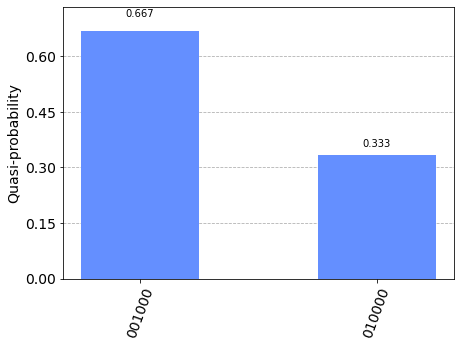

In [9]:
simulator = Aer.get_backend('statevector_simulator')

# Run and get counts
result=execute(qc,simulator).result()

counts = result.get_counts()

print("\nTotal count are:",counts)
plot_histogram(counts)


The resulting state is
 $| \psi  \rangle_4 =  \frac{1}{\sqrt{3}} | 0, 1; 0, 0; 0, 0  \rangle +\sqrt{\frac{2}{3}} | 0, 0; 1, 0; 0, 0  \rangle$

The pattern   $|10 \rangle$ is generated in the load register. We copy $|10 \rangle$ into the memory register of the processing branch (the  memory register before the operation  is in the ground state). We use the  ccX gate (CCNOT gate)  controlled by the load register and the control qubit $3$ ($c_2=1$ indicates the processing branch). 

In [10]:
qc = QuantumCircuit(6)

#0-1 loading register
#2-3 control register
#4-5 storage, memory 

qc.x(3)
qc.x(0)

qc.barrier()

qc.x(4)
qc.x(5)
qc.barrier()
qc.ccx(4,5,2)
qc.cu(1.230959417340775,pi,pi,0,2,3)
qc.ccx(4,5,2)
qc.barrier()
qc.x(4)
qc.x(5)
qc.cx(1,5)
qc.cx(0,4)
#Uncompute
qc.barrier()
qc.ccx(0,3,4)
qc.ccx(1,3,5)

qc.barrier()
qc.x(0)

qc.barrier()
#qc.x(0)
qc.x(1)

qc.barrier()

qc.ccx(0,3,4)
qc.ccx(1,3,5)
qc.barrier()


qc.draw(fold=230)

┌───┐ ░       ░                              ░                 ░            ░ ┌───┐ ░       ░            ░ 
q_0: ┤ X ├─░───────░──────────────────────────────░─────────────■───░───■────────░─┤ X ├─░───────░───■────────░─
     └───┘ ░       ░                              ░             │   ░   │        ░ └───┘ ░ ┌───┐ ░   │        ░ 
q_1: ──────░───────░──────────────────────────────░────────■────┼───░───┼────■───░───────░─┤ X ├─░───┼────■───░─
           ░       ░ ┌───┐                  ┌───┐ ░        │    │   ░   │    │   ░       ░ └───┘ ░   │    │   ░ 
q_2: ──────░───────░─┤ X ├────────■─────────┤ X ├─░────────┼────┼───░───┼────┼───░───────░───────░───┼────┼───░─
     ┌───┐ ░       ░ └─┬─┘┌───────┴────────┐└─┬─┘ ░        │    │   ░   │    │   ░       ░       ░   │    │   ░ 
q_3: ┤ X ├─░───────░───┼──┤ U(1.231,π,π,0) ├──┼───░────────┼────┼───░───■────■───░───────░───────░───■────■───░─
     └───┘ ░ ┌───┐ ░   │  └────────────────┘  │   ░ ┌───┐  │  ┌─┴─┐ ░ ┌─┴─┐  │   ░       ░       ░ ┌─┴─┐  │   ░ 
q_4: ──────░─┤ X ├─░───■──────────────────────■───░─┤ X ├──┼──┤ X ├─░─┤ X ├──┼───░───────░───────░─┤ X ├──┼───░─
           ░ ├───┤ ░   │                      │   ░ ├───┤┌─┴─┐└───┘ ░ └───┘┌─┴─┐ ░       ░       ░ └───┘┌─┴─┐ ░ 
q_5: ──────░─┤ X ├─░───■──────────────────────■───░─┤ X ├┤ X ├──────░──────┤ X ├─░───────░───────░──────┤ X ├─░─
           ░ └───┘ ░                              ░ └───┘└───┘      ░      └───┘ ░       ░       ░      └───┘ ░


Total count are: {'010010': 0.333333333333333, '101010': 0.666666666666666}


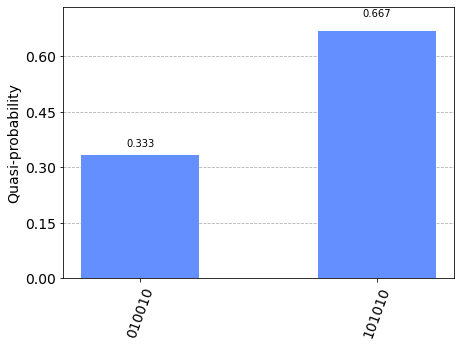

In [11]:
simulator = Aer.get_backend('statevector_simulator')

# Run and get counts
result=execute(qc,simulator).result()

counts = result.get_counts()

print("\nTotal count are:",counts)
plot_histogram(counts)

The resulting state is
 $| \psi  \rangle_5 =  \frac{1}{\sqrt{3}} | 0, 1; 0, 0; 1, 0  \rangle +\sqrt{\frac{2}{3}} | 1, 0; 1, 0; 1, 0  \rangle$.


We perform the controlled NOT operation controlled by the pattern  $|10 \rangle$ with the memory register of both branches using  cX gate. As a result  the memory register  of the processing branch is in the ground state $|00\rangle$. This is not the  case for the memory  register of memory  branch, where the bits are flipped leading to the state $|11 \rangle$.
We apply the NOT operation to the memory register of bot branches.
As a result  the  memory register of the processing branch is in the state  $|11 \rangle$. The control qubit $2$ ($c_1=1$ ) is entangled with the memory register $|11\rangle$ by the multi-controlled X gate.  


In [12]:
qc = QuantumCircuit(6)

#0-1 loading register
#2-3 control register
#4-5 storage, memory 

qc.x(3)
qc.x(0)

qc.barrier()

qc.x(4)
qc.x(5)

qc.barrier()
qc.ccx(4,5,2)
qc.cu(1.230959417340775,pi,pi,0,2,3)
qc.ccx(4,5,2)
qc.barrier()
qc.x(4)
qc.x(5)
qc.cx(1,5)
qc.cx(0,4)
#Uncompute
qc.barrier()
qc.ccx(0,3,4)
qc.ccx(1,3,5)

qc.barrier()
qc.x(0)

qc.barrier()
#qc.x(0)
qc.x(1)

qc.barrier()

qc.ccx(0,3,4)
qc.ccx(1,3,5)
qc.barrier()
qc.cx(1,5)
qc.cx(0,4)
qc.barrier()

qc.x(4)
qc.x(5)

qc.barrier()
qc.ccx(4,5,2)



qc.draw(fold=230)

┌───┐ ░       ░                              ░                 ░            ░ ┌───┐ ░       ░            ░            ░       ░      
q_0: ┤ X ├─░───────░──────────────────────────────░─────────────■───░───■────────░─┤ X ├─░───────░───■────────░────────■───░───────░──────
     └───┘ ░       ░                              ░             │   ░   │        ░ └───┘ ░ ┌───┐ ░   │        ░        │   ░       ░      
q_1: ──────░───────░──────────────────────────────░────────■────┼───░───┼────■───░───────░─┤ X ├─░───┼────■───░───■────┼───░───────░──────
           ░       ░ ┌───┐                  ┌───┐ ░        │    │   ░   │    │   ░       ░ └───┘ ░   │    │   ░   │    │   ░       ░ ┌───┐
q_2: ──────░───────░─┤ X ├────────■─────────┤ X ├─░────────┼────┼───░───┼────┼───░───────░───────░───┼────┼───░───┼────┼───░───────░─┤ X ├
     ┌───┐ ░       ░ └─┬─┘┌───────┴────────┐└─┬─┘ ░        │    │   ░   │    │   ░       ░       ░   │    │   ░   │    │   ░       ░ └─┬─┘
q_3: ┤ X ├─░───────░───┼──┤ U(1.231,π,π,0) ├──┼───░────────┼────┼───░───■────■───░───────░───────░───■────■───░───┼────┼───░───────░───┼──
     └───┘ ░ ┌───┐ ░   │  └────────────────┘  │   ░ ┌───┐  │  ┌─┴─┐ ░ ┌─┴─┐  │   ░       ░       ░ ┌─┴─┐  │   ░   │  ┌─┴─┐ ░ ┌───┐ ░   │  
q_4: ──────░─┤ X ├─░───■──────────────────────■───░─┤ X ├──┼──┤ X ├─░─┤ X ├──┼───░───────░───────░─┤ X ├──┼───░───┼──┤ X ├─░─┤ X ├─░───■──
           ░ ├───┤ ░   │                      │   ░ ├───┤┌─┴─┐└───┘ ░ └───┘┌─┴─┐ ░       ░       ░ └───┘┌─┴─┐ ░ ┌─┴─┐└───┘ ░ ├───┤ ░   │  
q_5: ──────░─┤ X ├─░───■──────────────────────■───░─┤ X ├┤ X ├──────░──────┤ X ├─░───────░───────░──────┤ X ├─░─┤ X ├──────░─┤ X ├─░───■──
           ░ └───┘ ░                              ░ └───┘└───┘      ░      └───┘ ░       ░       ░      └───┘ ░ └───┘      ░ └───┘ ░


Total count are: {'000010': 0.333333333333333, '111110': 0.666666666666666}


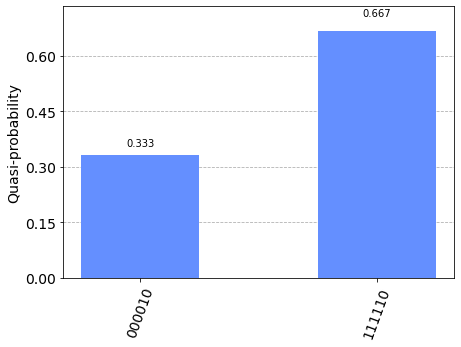

In [13]:
simulator = Aer.get_backend('statevector_simulator')

# Run and get counts
result=execute(qc,simulator).result()

counts = result.get_counts()

print("\nTotal count are:",counts)
plot_histogram(counts)

The resulting state is
 $| \psi  \rangle_6 =  \frac{1}{\sqrt{3}} | 0, 0; 0, 0; 1, 0  \rangle +\sqrt{\frac{2}{3}} | 1, 1; 1, 1; 1, 0  \rangle $.

he control qubit $2$ ($c_1=1$ ) is entangled with the memory register $|11\rangle$ of the proscessing ranch by  the multi-controlled X (Toffoli) gate.  
The processing branch is split  by the operator $CS_2$ ($p=2$), creating a  new memory  branch. 

In [14]:
qc = QuantumCircuit(6)

#0-1 loading register
#2-3 control register
#4-5 storage, memory 

qc.x(3)
qc.x(0)

qc.barrier()

qc.x(4)
qc.x(5)
qc.barrier()

qc.ccx(4,5,2)
qc.cu(1.230959417340775,pi,pi,0,2,3)
qc.ccx(4,5,2)
qc.barrier()
qc.x(4)
qc.x(5)
qc.cx(1,5)
qc.cx(0,4)
#Uncompute
qc.barrier()
qc.ccx(0,3,4)
qc.ccx(1,3,5)

qc.barrier()
qc.x(0)

qc.barrier()
#qc.x(0)
qc.x(1)

qc.barrier()

qc.ccx(0,3,4)
qc.ccx(1,3,5)
qc.barrier()
qc.cx(1,5)
qc.cx(0,4)
qc.barrier()

qc.x(4)
qc.x(5)

qc.barrier()
qc.ccx(4,5,2)

qc.cu(1.5707963267948966,pi,pi,0,2,3)



qc.draw(fold=230)

┌───┐ ░       ░                              ░                 ░            ░ ┌───┐ ░       ░            ░            ░       ░                      
q_0: ┤ X ├─░───────░──────────────────────────────░─────────────■───░───■────────░─┤ X ├─░───────░───■────────░────────■───░───────░──────────────────────
     └───┘ ░       ░                              ░             │   ░   │        ░ └───┘ ░ ┌───┐ ░   │        ░        │   ░       ░                      
q_1: ──────░───────░──────────────────────────────░────────■────┼───░───┼────■───░───────░─┤ X ├─░───┼────■───░───■────┼───░───────░──────────────────────
           ░       ░ ┌───┐                  ┌───┐ ░        │    │   ░   │    │   ░       ░ └───┘ ░   │    │   ░   │    │   ░       ░ ┌───┐                
q_2: ──────░───────░─┤ X ├────────■─────────┤ X ├─░────────┼────┼───░───┼────┼───░───────░───────░───┼────┼───░───┼────┼───░───────░─┤ X ├───────■────────
     ┌───┐ ░       ░ └─┬─┘┌───────┴────────┐└─┬─┘ ░        │    │   ░   │    │   ░       ░       ░   │    │   ░   │    │   ░       ░ └─┬─┘┌──────┴───────┐
q_3: ┤ X ├─░───────░───┼──┤ U(1.231,π,π,0) ├──┼───░────────┼────┼───░───■────■───░───────░───────░───■────■───░───┼────┼───░───────░───┼──┤ U(π/2,π,π,0) ├
     └───┘ ░ ┌───┐ ░   │  └────────────────┘  │   ░ ┌───┐  │  ┌─┴─┐ ░ ┌─┴─┐  │   ░       ░       ░ ┌─┴─┐  │   ░   │  ┌─┴─┐ ░ ┌───┐ ░   │  └──────────────┘
q_4: ──────░─┤ X ├─░───■──────────────────────■───░─┤ X ├──┼──┤ X ├─░─┤ X ├──┼───░───────░───────░─┤ X ├──┼───░───┼──┤ X ├─░─┤ X ├─░───■──────────────────
           ░ ├───┤ ░   │                      │   ░ ├───┤┌─┴─┐└───┘ ░ └───┘┌─┴─┐ ░       ░       ░ └───┘┌─┴─┐ ░ ┌─┴─┐└───┘ ░ ├───┤ ░   │                  
q_5: ──────░─┤ X ├─░───■──────────────────────■───░─┤ X ├┤ X ├──────░──────┤ X ├─░───────░───────░──────┤ X ├─░─┤ X ├──────░─┤ X ├─░───■──────────────────
           ░ └───┘ ░                              ░ └───┘└───┘      ░      └───┘ ░       ░       ░      └───┘ ░ └───┘      ░ └───┘ ░


Total count are: {'000010': 0.333333333333333, '110110': 0.333333333333333, '111110': 0.333333333333333}


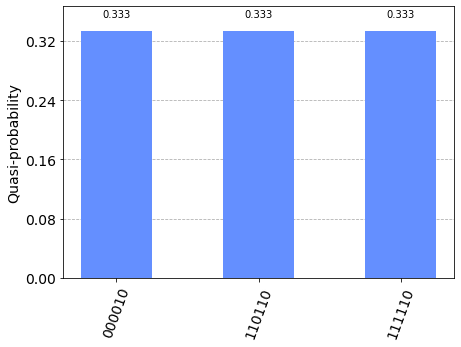

In [15]:
simulator = Aer.get_backend('statevector_simulator')

# Run and get counts
result=execute(qc,simulator).result()

counts = result.get_counts()

print("\nTotal count are:",counts)
plot_histogram(counts)


The resulting state is
 $| \psi  \rangle_7 =  \frac{1}{\sqrt{3}} | 0, 0; 0, 0; 1, 0  \rangle + \frac{1}{\sqrt{3}} | 1, 1; 0, 1; 1, 0  \rangle + \frac{1}{\sqrt{3}} | 1, 1; 1, 1; 1, 0  \rangle$.

We un-compute the entanglement of control qubit  $2$ ($c_1=1$) with the memory register $|11\rangle$ (using  the multi-controlled X (Toffoli) gate). We apply the NOT gates operation and the controlled NOT operation  (CNOT gate) to  the memory register  of the three branches. As result we un-flip (recover)   the memory register of the first memory branch to $|01 \rangle$ and copy $|10 \rangle$ into the  memory register of the other two branch. We un-compute the memory register of the processing branch, setting it to the the ground state $|00\rangle$. We use the  ccX gate (CCNOT gate)  controlled by the load register and the control qubit $3$ ($c_2=1$ indicates the processing branch). We reset the load register to the ground state  $|00\rangle$.

In [16]:
qc = QuantumCircuit(6)

#0-1 loading register
#2-3 control register
#4-5 storage, memory 

qc.x(3)
qc.x(0)

qc.barrier()

qc.x(4)
qc.x(5)
qc.barrier()

qc.ccx(4,5,2)
qc.cu(1.230959417340775,pi,pi,0,2,3)
qc.ccx(4,5,2)
qc.barrier()
qc.x(4)
qc.x(5)
qc.cx(1,5)
qc.cx(0,4)
#Uncompute
qc.barrier()
qc.ccx(0,3,4)
qc.ccx(1,3,5)

qc.barrier()
qc.x(0)

qc.barrier()
#qc.x(0)
qc.x(1)

qc.barrier()

qc.ccx(0,3,4)
qc.ccx(1,3,5)
qc.barrier()
qc.cx(1,5)
qc.cx(0,4)
qc.barrier()

qc.x(4)
qc.x(5)

qc.barrier()
qc.ccx(4,5,2)

qc.cu(1.5707963267948966,pi,pi,0,2,3)

qc.ccx(4,5,2)
qc.barrier()

qc.x(4)
qc.x(5)

qc.cx(1,5)
qc.cx(0,4)

#Uncompute
qc.barrier()
qc.ccx(0,3,4)
qc.ccx(1,3,5)

qc.x(1)

qc.draw(fold=230)

┌───┐ ░       ░                              ░                 ░            ░ ┌───┐ ░       ░            ░            ░       ░                            ░                 ░                
q_0: ┤ X ├─░───────░──────────────────────────────░─────────────■───░───■────────░─┤ X ├─░───────░───■────────░────────■───░───────░────────────────────────────░─────────────■───░───■────────────
     └───┘ ░       ░                              ░             │   ░   │        ░ └───┘ ░ ┌───┐ ░   │        ░        │   ░       ░                            ░             │   ░   │       ┌───┐
q_1: ──────░───────░──────────────────────────────░────────■────┼───░───┼────■───░───────░─┤ X ├─░───┼────■───░───■────┼───░───────░────────────────────────────░────────■────┼───░───┼────■──┤ X ├
           ░       ░ ┌───┐                  ┌───┐ ░        │    │   ░   │    │   ░       ░ └───┘ ░   │    │   ░   │    │   ░       ░ ┌───┐                ┌───┐ ░        │    │   ░   │    │  └───┘
q_2: ──────░───────░─┤ X ├────────■─────────┤ X ├─░────────┼────┼───░───┼────┼───░───────░───────░───┼────┼───░───┼────┼───░───────░─┤ X ├───────■────────┤ X ├─░────────┼────┼───░───┼────┼───────
     ┌───┐ ░       ░ └─┬─┘┌───────┴────────┐└─┬─┘ ░        │    │   ░   │    │   ░       ░       ░   │    │   ░   │    │   ░       ░ └─┬─┘┌──────┴───────┐└─┬─┘ ░        │    │   ░   │    │       
q_3: ┤ X ├─░───────░───┼──┤ U(1.231,π,π,0) ├──┼───░────────┼────┼───░───■────■───░───────░───────░───■────■───░───┼────┼───░───────░───┼──┤ U(π/2,π,π,0) ├──┼───░────────┼────┼───░───■────■───────
     └───┘ ░ ┌───┐ ░   │  └────────────────┘  │   ░ ┌───┐  │  ┌─┴─┐ ░ ┌─┴─┐  │   ░       ░       ░ ┌─┴─┐  │   ░   │  ┌─┴─┐ ░ ┌───┐ ░   │  └──────────────┘  │   ░ ┌───┐  │  ┌─┴─┐ ░ ┌─┴─┐  │       
q_4: ──────░─┤ X ├─░───■──────────────────────■───░─┤ X ├──┼──┤ X ├─░─┤ X ├──┼───░───────░───────░─┤ X ├──┼───░───┼──┤ X ├─░─┤ X ├─░───■────────────────────■───░─┤ X ├──┼──┤ X ├─░─┤ X ├──┼───────
           ░ ├───┤ ░   │                      │   ░ ├───┤┌─┴─┐└───┘ ░ └───┘┌─┴─┐ ░       ░       ░ └───┘┌─┴─┐ ░ ┌─┴─┐└───┘ ░ ├───┤ ░   │                    │   ░ ├───┤┌─┴─┐└───┘ ░ └───┘┌─┴─┐     
q_5: ──────░─┤ X ├─░───■──────────────────────■───░─┤ X ├┤ X ├──────░──────┤ X ├─░───────░───────░──────┤ X ├─░─┤ X ├──────░─┤ X ├─░───■────────────────────■───░─┤ X ├┤ X ├──────░──────┤ X ├─────
           ░ └───┘ ░                              ░ └───┘└───┘      ░      └───┘ ░       ░       ░      └───┘ ░ └───┘      ░ └───┘ ░                            ░ └───┘└───┘      ░      └───┘


Total count are: {'001000': 0.333333333333333, '010000': 0.333333333333333, '100000': 0.333333333333333}


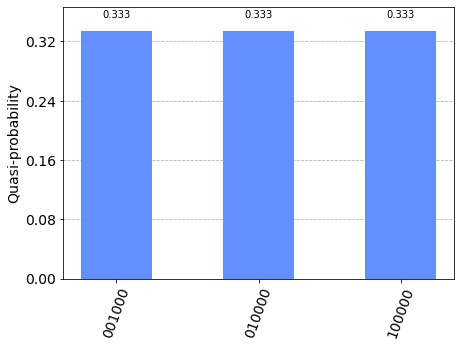

In [17]:
simulator = Aer.get_backend('statevector_simulator')

# Run and get counts
result=execute(qc,simulator).result()

counts = result.get_counts()

print("\nTotal count are:",counts)
plot_histogram(counts)

 The resulting state is
 $ | \psi  \rangle_8 =  \frac{1}{\sqrt{3}} | 0, 0; 1, 0; 0, 0  \rangle + \frac{1}{\sqrt{3}} | 0, 1; 0, 0; 0, 0  \rangle + \frac{1}{\sqrt{3}} | 1, 0; 0, 0; 0, 0  \rangle$

n the load register pattern   $|11 \rangle$ is generated. The first qubit  of the pattern   $|11 \rangle$, qubit $0$, is entangled
with the qubit $3$ of control register $c_2=1$ using the controlled NOT gate cX. 
We copy $|11 \rangle$ into the memory register of the processing branch  by the  ccX gate (CCNOT gate)  controlled by the load register and the control qubit $3$ ($c_2=1$ indicates the processing branch).  We convert the processing branch into a memory branch by setting  the qubit $3$ of the control register $c_2$ to zero by the entangled qubit $0$ of the pattern $|11 \rangle$ (using controlled NOT gate cX).
We reset the load register to the ground state  $|00\rangle$. The entangled qubit in the load register is set to zero by the  ccX gate (CCNOT gate) with the  control qubits represented by the memory register of the stored  pattern $|11 \rangle$.
 We measure the memory register: qubit $4$ and $5$ using the \textit{qasm simulator} with  $shots=10000$. 

In [18]:
qc = QuantumCircuit(6,2)

#0-1 loading register
#2-3 control register
#4-5 storage, memory 

qc.x(3)
qc.x(0)

qc.barrier()

qc.x(4)
qc.x(5)
qc.barrier()

qc.ccx(4,5,2)
qc.cu(1.230959417340775,pi,pi,0,2,3)
qc.ccx(4,5,2)
qc.barrier()
qc.x(4)
qc.x(5)
qc.cx(1,5)
qc.cx(0,4)
#Uncompute
qc.barrier()
qc.ccx(0,3,4)
qc.ccx(1,3,5)

qc.barrier()
qc.x(0)

qc.barrier()
#qc.x(0)
qc.x(1)

qc.barrier()

qc.ccx(0,3,4)
qc.ccx(1,3,5)
qc.barrier()
qc.cx(1,5)
qc.cx(0,4)
qc.barrier()

qc.x(4)
qc.x(5)

qc.barrier()
qc.ccx(4,5,2)

qc.cu(1.5707963267948966,pi,pi,0,2,3)

qc.ccx(4,5,2)
qc.barrier()

qc.x(4)
qc.x(5)

qc.cx(1,5)
qc.cx(0,4)

#Uncompute
qc.barrier()
qc.ccx(0,3,4)
qc.ccx(1,3,5)

qc.x(1)


qc.barrier()

qc.cx(3,0)
qc.x(1)


qc.ccx(0,3,4)
qc.ccx(1,3,5)

qc.cx(0,3)


#qc.x(0)
qc.ccx(4,5,0)
qc.x(1)

qc.barrier()

qc.measure(4,0)
qc.measure(5,1)

qc.draw(fold=260)

┌───┐ ░       ░                              ░                 ░            ░ ┌───┐ ░       ░            ░            ░       ░                            ░                 ░                 ░ ┌───┐                         ┌───┐ ░       
q_0: ┤ X ├─░───────░──────────────────────────────░─────────────■───░───■────────░─┤ X ├─░───────░───■────────░────────■───░───────░────────────────────────────░─────────────■───░───■─────────────░─┤ X ├───────■─────────■───────┤ X ├─░───────
     └───┘ ░       ░                              ░             │   ░   │        ░ └───┘ ░ ┌───┐ ░   │        ░        │   ░       ░                            ░             │   ░   │       ┌───┐ ░ └─┬─┘┌───┐  │         │  ┌───┐└─┬─┘ ░       
q_1: ──────░───────░──────────────────────────────░────────■────┼───░───┼────■───░───────░─┤ X ├─░───┼────■───░───■────┼───░───────░────────────────────────────░────────■────┼───░───┼────■──┤ X ├─░───┼──┤ X ├──┼────■────┼──┤ X ├──┼───░───────
           ░       ░ ┌───┐                  ┌───┐ ░        │    │   ░   │    │   ░       ░ └───┘ ░   │    │   ░   │    │   ░       ░ ┌───┐                ┌───┐ ░        │    │   ░   │    │  └───┘ ░   │  └───┘  │    │    │  └───┘  │   ░       
q_2: ──────░───────░─┤ X ├────────■─────────┤ X ├─░────────┼────┼───░───┼────┼───░───────░───────░───┼────┼───░───┼────┼───░───────░─┤ X ├───────■────────┤ X ├─░────────┼────┼───░───┼────┼────────░───┼─────────┼────┼────┼─────────┼───░───────
     ┌───┐ ░       ░ └─┬─┘┌───────┴────────┐└─┬─┘ ░        │    │   ░   │    │   ░       ░       ░   │    │   ░   │    │   ░       ░ └─┬─┘┌──────┴───────┐└─┬─┘ ░        │    │   ░   │    │        ░   │         │    │  ┌─┴─┐       │   ░       
q_3: ┤ X ├─░───────░───┼──┤ U(1.231,π,π,0) ├──┼───░────────┼────┼───░───■────■───░───────░───────░───■────■───░───┼────┼───░───────░───┼──┤ U(π/2,π,π,0) ├──┼───░────────┼────┼───░───■────■────────░───■─────────■────■──┤ X ├───────┼───░───────
     └───┘ ░ ┌───┐ ░   │  └────────────────┘  │   ░ ┌───┐  │  ┌─┴─┐ ░ ┌─┴─┐  │   ░       ░       ░ ┌─┴─┐  │   ░   │  ┌─┴─┐ ░ ┌───┐ ░   │  └──────────────┘  │   ░ ┌───┐  │  ┌─┴─┐ ░ ┌─┴─┐  │        ░           ┌─┴─┐  │  └───┘       │   ░ ┌─┐   
q_4: ──────░─┤ X ├─░───■──────────────────────■───░─┤ X ├──┼──┤ X ├─░─┤ X ├──┼───░───────░───────░─┤ X ├──┼───░───┼──┤ X ├─░─┤ X ├─░───■────────────────────■───░─┤ X ├──┼──┤ X ├─░─┤ X ├──┼────────░───────────┤ X ├──┼──────────────■───░─┤M├───
           ░ ├───┤ ░   │                      │   ░ ├───┤┌─┴─┐└───┘ ░ └───┘┌─┴─┐ ░       ░       ░ └───┘┌─┴─┐ ░ ┌─┴─┐└───┘ ░ ├───┤ ░   │                    │   ░ ├───┤┌─┴─┐└───┘ ░ └───┘┌─┴─┐      ░           └───┘┌─┴─┐            │   ░ └╥┘┌─┐
q_5: ──────░─┤ X ├─░───■──────────────────────■───░─┤ X ├┤ X ├──────░──────┤ X ├─░───────░───────░──────┤ X ├─░─┤ X ├──────░─┤ X ├─░───■────────────────────■───░─┤ X ├┤ X ├──────░──────┤ X ├──────░────────────────┤ X ├────────────■───░──╫─┤M├
           ░ └───┘ ░                              ░ └───┘└───┘      ░      └───┘ ░       ░       ░      └───┘ ░ └───┘      ░ └───┘ ░                            ░ └───┘└───┘      ░      └───┘      ░                └───┘                ░  ║ └╥┘
c: 2/════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╩══╩═
                                                                                                                                                                                                                                             0  1


Total count are: {'01': 3294, '11': 3315, '10': 3391}


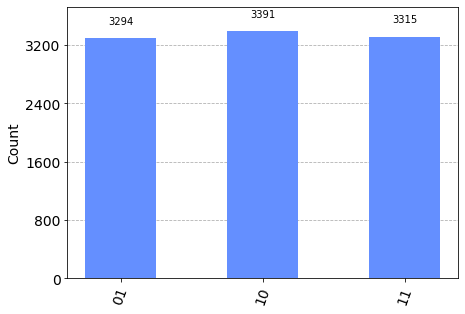

In [19]:
simulator = Aer.get_backend('qasm_simulator')
result=execute(qc,simulator,shots=10000).result()
counts = result.get_counts()
print("\nTotal count are:",counts)
plot_histogram(counts)

The results of the measurement represent the desired distribution
\begin{equation}
\psi  \rangle =\frac{1}{\sqrt{3}} \cdot \left( |  0, 1  \rangle +  | 1, 0  \rangle +  |  1, 1  \rangle \right).
\end{equation}

## Entanglement of Binary Patterns

In this example we store four binary patterns,
\begin{equation}
|101 \rangle_4,~~  |011 \rangle_3,~~ |111 \rangle_2,~~ |010 \rangle_1
\end{equation}
by entanglement  with the four index qubits $|  index_j    \rangle$ in superposition 
\begin{equation}
 | index_4    \rangle= |   11 \rangle~~~ | index_3 \rangle= |   10 \rangle~~~ 
   | index_2    \rangle= |   01 \rangle~~~| index_1    \rangle= |   00 \rangle
\end{equation}
 using controlled NOT gates   (ccX gates)  

In [20]:
qc = QuantumCircuit(5)

#0-2 data
#Index
#3-4
qc.h(3)
qc.h(4)

#First patern
qc.ccx(3,4,0)
qc.ccx(3,4,2)
qc.barrier()
#Second patern
qc.x(3)
qc.ccx(3,4,0)
qc.ccx(3,4,1)
qc.x(3)

qc.barrier()
#Third patern
qc.x(4)
qc.ccx(3,4,0)
qc.ccx(3,4,1)
qc.ccx(3,4,2)
qc.x(4)

qc.barrier()
#Fourth patern
qc.x(3)
qc.x(4)
qc.ccx(3,4,1)
qc.x(4)
qc.x(3)

qc.draw(fold=160)

┌───┐      ░      ┌───┐           ░      ┌───┐                ░                
q_0: ─────┤ X ├──────░──────┤ X ├───────────░──────┤ X ├────────────────░────────────────
          └─┬─┘      ░      └─┬─┘┌───┐      ░      └─┬─┘┌───┐           ░      ┌───┐     
q_1: ───────┼────────░────────┼──┤ X ├──────░────────┼──┤ X ├───────────░──────┤ X ├─────
            │  ┌───┐ ░        │  └─┬─┘      ░        │  └─┬─┘┌───┐      ░      └─┬─┘     
q_2: ───────┼──┤ X ├─░────────┼────┼────────░────────┼────┼──┤ X ├──────░────────┼───────
     ┌───┐  │  └─┬─┘ ░ ┌───┐  │    │  ┌───┐ ░        │    │  └─┬─┘      ░ ┌───┐  │  ┌───┐
q_3: ┤ H ├──■────■───░─┤ X ├──■────■──┤ X ├─░────────■────■────■────────░─┤ X ├──■──┤ X ├
     ├───┤  │    │   ░ └───┘  │    │  └───┘ ░ ┌───┐  │    │    │  ┌───┐ ░ ├───┤  │  ├───┤
q_4: ┤ H ├──■────■───░────────■────■────────░─┤ X ├──■────■────■──┤ X ├─░─┤ X ├──■──┤ X ├
     └───┘           ░                      ░ └───┘               └───┘ ░ └───┘     └───┘

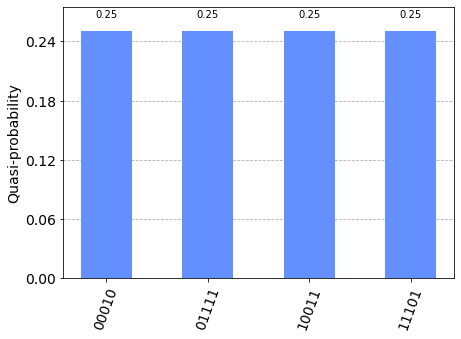

In [21]:
simulator = Aer.get_backend('statevector_simulator')
result=execute(qc,simulator).result()
counts = result.get_counts()
plot_histogram(counts)

 The histogram representing the superposition, qubits $0,1,2$ represent the patterns and the qubits $4,5$ the index qubits.

The superposition of patterns with their indexes is represented as
\begin{equation}
| \psi  \rangle= \frac{1}{2} \cdot \left(  | 00010\rangle_1  + |01111 \rangle_2  + |10011 \rangle_3 +  |11101 \rangle_4  \right).
\end{equation}

We can entangle several copies of superposition binary pattern vectors that can be processed and measured independently

In [22]:
qc = QuantumCircuit(18,5)

#1St magazine
#0-2 data
#Index
#3-4
qc.h(3)
qc.h(4)
#Aux 5

#2th magazine
#6-8 data
#Index
#9-10
qc.h(9)
qc.h(10)
#Aux 11

#3th magazine
#12-14 data
#Index
#15-16
qc.h(15)
qc.h(16)
#Aux 17


qc.barrier()

#First patern

qc.ccx(3,4,0)
qc.ccx(3,4,2)

qc.ccx(9,10,6)
qc.ccx(9,10,8)

qc.ccx(15,16,12)
qc.ccx(15,16,14)

qc.barrier()
#Second patern

qc.x(3)
qc.x(9)
qc.x(15)

qc.ccx(3,4,0)
qc.ccx(3,4,1)

qc.ccx(9,10,6)
qc.ccx(9,10,7)

qc.ccx(15,16,12)
qc.ccx(15,16,13)

qc.x(15)
qc.x(9)
qc.x(3)

qc.barrier()
#Third patern

qc.x(4)
qc.x(10)
qc.x(16)

qc.ccx(3,4,0)
qc.ccx(3,4,1)
qc.ccx(3,4,2)

qc.ccx(9,10,6)
qc.ccx(9,10,7)
qc.ccx(9,10,8)

qc.ccx(15,16,12)
qc.ccx(15,16,13)
qc.ccx(15,16,14)

qc.x(16)
qc.x(10)
qc.x(4)

qc.barrier()
#Fourth patern

qc.x(3)
qc.x(4)
qc.x(9)
qc.x(10)
qc.x(15)
qc.x(16)

qc.ccx(3,4,1)

qc.ccx(9,10,7)

qc.ccx(15,16,13)

qc.x(16)
qc.x(15)
qc.x(10)
qc.x(9)
qc.x(4)
qc.x(3)


qc.barrier()

#qc.measure(0,0)
#qc.measure(1,1)
#qc.measure(2,2)
#qc.measure(3,3)
#qc.measure(4,4)

qc.measure(6,0)
qc.measure(7,1)
qc.measure(8,2)
qc.measure(9,3)
qc.measure(10,4)

qc.draw(fold=160)



░ ┌───┐      ░      ┌───┐           ░      ┌───┐                ░                 ░                
 q_0: ──────░─┤ X ├──────░──────┤ X ├───────────░──────┤ X ├────────────────░─────────────────░────────────────
            ░ └─┬─┘      ░      └─┬─┘┌───┐      ░      └─┬─┘┌───┐           ░      ┌───┐      ░                
 q_1: ──────░───┼────────░────────┼──┤ X ├──────░────────┼──┤ X ├───────────░──────┤ X ├──────░────────────────
            ░   │  ┌───┐ ░        │  └─┬─┘      ░        │  └─┬─┘┌───┐      ░      └─┬─┘      ░                
 q_2: ──────░───┼──┤ X ├─░────────┼────┼────────░────────┼────┼──┤ X ├──────░────────┼────────░────────────────
      ┌───┐ ░   │  └─┬─┘ ░ ┌───┐  │    │  ┌───┐ ░        │    │  └─┬─┘      ░ ┌───┐  │  ┌───┐ ░                
 q_3: ┤ H ├─░───■────■───░─┤ X ├──■────■──┤ X ├─░────────■────■────■────────░─┤ X ├──■──┤ X ├─░────────────────
      ├───┤ ░   │    │   ░ └───┘  │    │  └───┘ ░ ┌───┐  │    │    │  ┌───┐ ░ ├───┤  │  ├───┤ ░                
 q_4: ┤ H ├─░───■────■───░────────■────■────────░─┤ X ├──■────■────■──┤ X ├─░─┤ X ├──■──┤ X ├─░────────────────
      └───┘ ░            ░                      ░ └───┘               └───┘ ░ └───┘     └───┘ ░                
 q_5: ──────░────────────░──────────────────────░───────────────────────────░─────────────────░────────────────
            ░ ┌───┐      ░      ┌───┐           ░      ┌───┐                ░                 ░ ┌─┐            
 q_6: ──────░─┤ X ├──────░──────┤ X ├───────────░──────┤ X ├────────────────░─────────────────░─┤M├────────────
            ░ └─┬─┘      ░      └─┬─┘┌───┐      ░      └─┬─┘┌───┐           ░      ┌───┐      ░ └╥┘┌─┐         
 q_7: ──────░───┼────────░────────┼──┤ X ├──────░────────┼──┤ X ├───────────░──────┤ X ├──────░──╫─┤M├─────────
            ░   │  ┌───┐ ░        │  └─┬─┘      ░        │  └─┬─┘┌───┐      ░      └─┬─┘      ░  ║ └╥┘┌─┐      
 q_8: ──────░───┼──┤ X ├─░────────┼────┼────────░────────┼────┼──┤ X ├──────░────────┼────────░──╫──╫─┤M├──────
      ┌───┐ ░   │  └─┬─┘ ░ ┌───┐  │    │  ┌───┐ ░        │    │  └─┬─┘      ░ ┌───┐  │  ┌───┐ ░  ║  ║ └╥┘┌─┐   
 q_9: ┤ H ├─░───■────■───░─┤ X ├──■────■──┤ X ├─░────────■────■────■────────░─┤ X ├──■──┤ X ├─░──╫──╫──╫─┤M├───
      ├───┤ ░   │    │   ░ └───┘  │    │  └───┘ ░ ┌───┐  │    │    │  ┌───┐ ░ ├───┤  │  ├───┤ ░  ║  ║  ║ └╥┘┌─┐
q_10: ┤ H ├─░───■────■───░────────■────■────────░─┤ X ├──■────■────■──┤ X ├─░─┤ X ├──■──┤ X ├─░──╫──╫──╫──╫─┤M├
      └───┘ ░            ░                      ░ └───┘               └───┘ ░ └───┘     └───┘ ░  ║  ║  ║  ║ └╥┘
q_11: ──────░────────────░──────────────────────░───────────────────────────░─────────────────░──╫──╫──╫──╫──╫─
            ░ ┌───┐      ░      ┌───┐           ░      ┌───┐                ░                 ░  ║  ║  ║  ║  ║ 
q_12: ──────░─┤ X ├──────░──────┤ X ├───────────░──────┤ X ├────────────────░─────────────────░──╫──╫──╫──╫──╫─
            ░ └─┬─┘      ░      └─┬─┘┌───┐      ░      └─┬─┘┌───┐           ░      ┌───┐      ░  ║  ║  ║  ║  ║ 
q_13: ──────░───┼────────░────────┼──┤ X ├──────░────────┼──┤ X ├───────────░──────┤ X ├──────░──╫──╫──╫──╫──╫─
            ░   │  ┌───┐ ░        │  └─┬─┘      ░        │  └─┬─┘┌───┐      ░      └─┬─┘      ░  ║  ║  ║  ║  ║ 
q_14: ──────░───┼──┤ X ├─░────────┼────┼────────░────────┼────┼──┤ X ├──────░────────┼────────░──╫──╫──╫──╫──╫─
      ┌───┐ ░   │  └─┬─┘ ░ ┌───┐  │    │  ┌───┐ ░        │    │  └─┬─┘      ░ ┌───┐  │  ┌───┐ ░  ║  ║  ║  ║  ║ 
q_15: ┤ H ├─░───■────■───░─┤ X ├──■────■──┤ X ├─░────────■────■────■────────░─┤ X ├──■──┤ X ├─░──╫──╫──╫──╫──╫─
      ├───┤ ░   │    │   ░ └───┘  │    │  └───┘ ░ ┌───┐  │    │    │  ┌───┐ ░ ├───┤  │  ├───┤ ░  ║  ║  ║  ║  ║ 
q_16: ┤ H ├─░───■────■───░────────■────■────────░─┤ X ├──■────■────■──┤ X ├─░─┤ X ├──■──┤ X ├─░──╫──╫──╫──╫──╫─
      └───┘ ░            ░                      ░ └───┘               └───┘ ░ └───┘     └───┘ ░  ║  ║  ║  ║  ║ 
q_17: ──────░────────────░──────────────────────░───────────────────────────░───────────────


Total count are: {'01111': 238, '00010': 241, '10011': 252, '11101': 269}


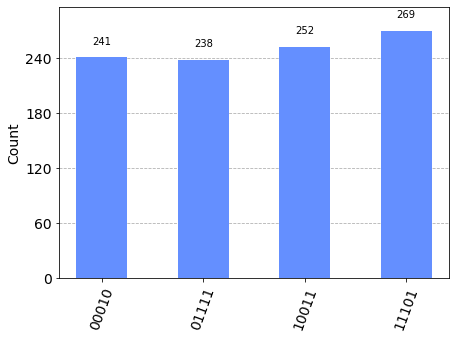

In [23]:
simulator = Aer.get_backend('qasm_simulator')
result=execute(qc,simulator,shots=1000).result()
counts = result.get_counts()
print("\nTotal count are:",counts)

plot_histogram(counts)